# Data Analysis and Visualization

Importing required libraries

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import openpyxl

Reading the file path and the corresponding sheets into dataframes

In [131]:
file= pd.ExcelFile('./Copy of Data analyst Assignment 1 (1).xlsx')
customers=pd.read_excel(file,'customers')
loan_details=pd.read_excel(file,'loan details')

Updating datatype of a few variables

In [132]:
customers['customer_id']=customers['customer_id'].astype(int)
loan_details['loan_number']=loan_details['loan_number'].astype(int)
loan_details['customer_id']=loan_details['customer_id'].astype(int)

Taking a look at the dataframes.

In [134]:
display(loan_details,customers)

,loan_number,loan_product,amount_pending,due_date,customer_id
0,100,NaN,374.69,2020-12-19,440
1,101,bnpl,688.80,2021-02-14,555
2,102,vehicle loan,928.87,2021-03-19,250
3,103,personal loan,433.99,2020-09-07,180
4,104,vehicle loan,157.55,2020-10-01,597
...,...,...,...,...,...
896,996,personal loan,865.72,2020-12-29,482
897,997,vehicle loan,685.54,2020-10-13,469
898,998,personal loan,761.91,2021-06-06,262
899,999,vehicle loan,394.20,2021-10-22,587


,customer_id,firstname,lastname,email,profession
0,100,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer
1,101,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer
2,102,Diena,Manolo,Diena.Manolo@yopmail.com,firefighter
3,103,Cristine,Yuille,Cristine.Yuille@yopmail.com,firefighter
4,104,Dania,Auberbach,Dania.Auberbach@yopmail.com,doctor
...,...,...,...,...,...
719,819,Rochette,Delacourt,Rochette.Delacourt@yopmail.com,police officer
720,820,Anthia,Gale,Anthia.Gale@yopmail.com,doctor
721,821,Elvira,Septima,Elvira.Septima@yopmail.com,doctor
722,822,Albertina,Quinn,Albertina.Quinn@yopmail.com,police officer


Ensuring there are no null values anywhere

In [135]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724 entries, 0 to 723
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  724 non-null    int64 
 1   firstname    724 non-null    object
 2   lastname     724 non-null    object
 3   email        724 non-null    object
 4   profession   724 non-null    object
dtypes: int64(1), object(4)
memory usage: 28.4+ KB


In [136]:
loan_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   loan_number     901 non-null    int64         
 1   loan_product    690 non-null    object        
 2   amount_pending  901 non-null    float64       
 3   due_date        901 non-null    datetime64[ns]
 4   customer_id     901 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 35.3+ KB


Quite a few of the loan product values are missing, updating these as unknown

In [137]:
loan_details['loan_product'] = loan_details['loan_product'].fillna("Unknown")


Checking number of unique customers in loan details and customers tables

In [139]:
loan_details['customer_id'].nunique()

381

In [140]:
customers['customer_id'].nunique()

724

Inner join of the tables

In [142]:
joined_table = pd.merge(loan_details,customers)

In [143]:
display(joined_table)

,loan_number,loan_product,amount_pending,due_date,customer_id,firstname,lastname,email,profession
0,100,Unknown,374.69,2020-12-19,440,Felice,Artie,Felice.Artie@yopmail.com,firefighter
1,701,vehicle loan,134.00,2021-05-20,440,Felice,Artie,Felice.Artie@yopmail.com,firefighter
2,824,personal loan,400.62,2021-05-04,440,Felice,Artie,Felice.Artie@yopmail.com,firefighter
3,101,bnpl,688.80,2021-02-14,555,Clementine,Rolf,Clementine.Rolf@yopmail.com,worker
4,825,personal loan,538.56,2021-04-14,555,Clementine,Rolf,Clementine.Rolf@yopmail.com,worker
...,...,...,...,...,...,...,...,...,...
896,811,vehicle loan,499.93,2021-09-09,267,Tierney,Dannye,Tierney.Dannye@yopmail.com,firefighter
897,815,Unknown,100.86,2021-07-09,150,Esmeralda,Velick,Esmeralda.Velick@yopmail.com,police officer
898,816,bnpl,323.68,2021-12-03,101,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer
899,817,bnpl,115.30,2020-09-16,386,Genevra,Wallis,Genevra.Wallis@yopmail.com,worker


Outer join of the tables

In [144]:
outer_join = pd.merge(customers, loan_details, on='customer_id', how='outer')

In [145]:
display(outer_join)

,customer_id,firstname,lastname,email,profession,loan_number,loan_product,amount_pending,due_date
0,100,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer,227.0,Unknown,320.20,2020-10-31
1,100,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer,316.0,personal loan,329.55,2021-04-14
2,100,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer,951.0,personal loan,461.32,2020-08-07
3,101,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer,816.0,bnpl,323.68,2021-12-03
4,102,Diena,Manolo,Diena.Manolo@yopmail.com,firefighter,458.0,personal loan,132.03,2021-02-19
...,...,...,...,...,...,...,...,...,...
1239,819,Rochette,Delacourt,Rochette.Delacourt@yopmail.com,police officer,NaN,NaN,NaN,NaT
1240,820,Anthia,Gale,Anthia.Gale@yopmail.com,doctor,NaN,NaN,NaN,NaT
1241,821,Elvira,Septima,Elvira.Septima@yopmail.com,doctor,NaN,NaN,NaN,NaT
1242,822,Albertina,Quinn,Albertina.Quinn@yopmail.com,police officer,NaN,NaN,NaN,NaT


Visualization of loan count vs profession

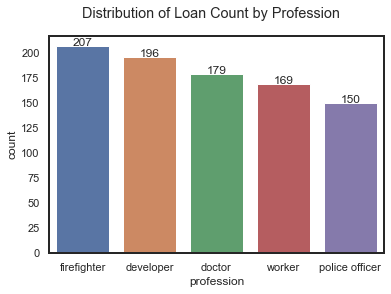

In [146]:
count= sns.countplot(x='profession', data=joined_table, order=joined_table['profession'].value_counts().index)
for profession in count.patches:
    count.annotate('{:.0f}'.format(profession.get_height()),(profession.get_x()+0.25,profession.get_height()+0.01))
plt.suptitle('Distribution of Loan Count by Profession', y=0.98)
plt.show()

Visualization of loan amount vs profession

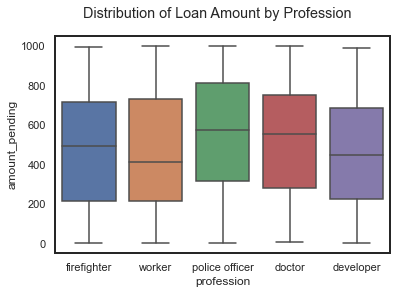

In [97]:
box=sns.boxplot(x=joined_table['profession'],y=joined_table['amount_pending'])
plt.suptitle('Distribution of Loan Amount by Profession', y=0.98)
plt.show()

Text(0.5, 0.98, 'Loan Details - Amount Pending by Profession')

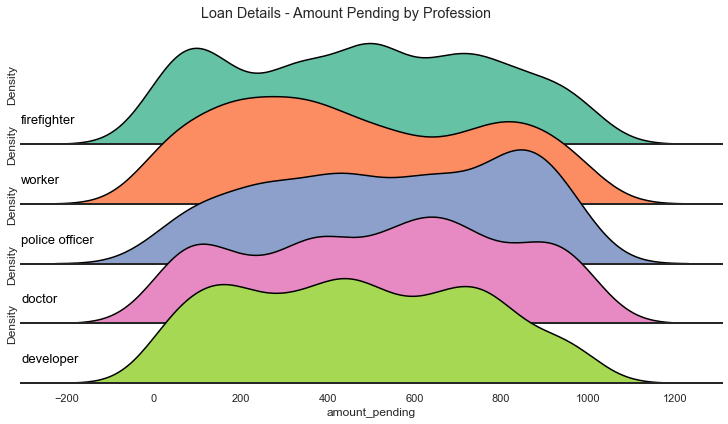

In [98]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(joined_table, palette=palette, row="profession", hue="profession", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="amount_pending", fill=True, alpha=1,bw_adjust=.75)
g.map_dataframe(sns.kdeplot, x="amount_pending", color='black', bw_adjust=.75)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "profession")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="amount_pending")
g.despine( left=True)
plt.suptitle('Loan Details - Amount Pending by Profession', y=0.98)

Visualization of loan count vs loan product

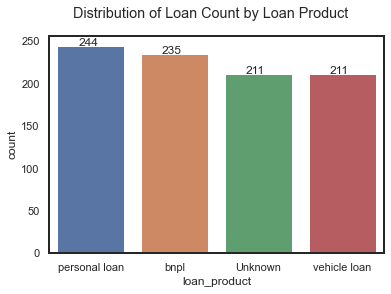

In [147]:
count= sns.countplot(x='loan_product', data=joined_table, order=joined_table['loan_product'].value_counts().index)
for loan_product in count.patches:
    count.annotate('{:.0f}'.format(loan_product.get_height()),(loan_product.get_x()+0.25,loan_product.get_height()+0.01))
plt.suptitle('Distribution of Loan Count by Loan Product', y=0.98)
plt.show()

Visualization of loan amount vs loan product

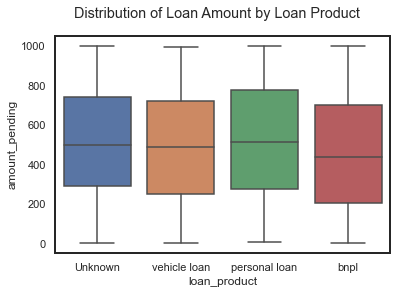

In [148]:
sns.boxplot(x=joined_table['loan_product'],y=joined_table['amount_pending'])
plt.suptitle('Distribution of Loan Amount by Loan Product', y=0.98)
plt.show()

Finding out customers who have no loans pending

In [149]:
inner_merge_index = pd.merge(customers.reset_index(), loan_details, how='inner').set_index(['customer_id']).index

In [150]:
no_loans = customers.drop(list(inner_merge_index))

In [151]:
no_loans

,customer_id,firstname,lastname,email,profession
0,100,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer
1,101,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer
2,102,Diena,Manolo,Diena.Manolo@yopmail.com,firefighter
3,103,Cristine,Yuille,Cristine.Yuille@yopmail.com,firefighter
4,104,Dania,Auberbach,Dania.Auberbach@yopmail.com,doctor
...,...,...,...,...,...
719,819,Rochette,Delacourt,Rochette.Delacourt@yopmail.com,police officer
720,820,Anthia,Gale,Anthia.Gale@yopmail.com,doctor
721,821,Elvira,Septima,Elvira.Septima@yopmail.com,doctor
722,822,Albertina,Quinn,Albertina.Quinn@yopmail.com,police officer


Displaying customers wiht maximum number of loans

In [110]:
number_of_loans = joined_table.groupby(['customer_id', 'firstname','lastname','email','profession'])['customer_id'].count().reset_index(name='number_of_loans')
number_of_loans = number_of_loans.sort_values(by=['number_of_loans'], ascending=False)
number_of_loans.nlargest(10, 'number_of_loans')

,customer_id,firstname,lastname,email,profession,number_of_loans
191,345,Barbara,Pascia,Barbara.Pascia@yopmail.com,developer,9
106,241,Joelly,Wenoa,Joelly.Wenoa@yopmail.com,firefighter,7
267,449,Shaylyn,Hutchison,Shaylyn.Hutchison@yopmail.com,firefighter,7
90,219,Jacenta,Hailee,Jacenta.Hailee@yopmail.com,doctor,7
337,538,Kaja,Anton,Kaja.Anton@yopmail.com,doctor,6
259,438,Kylynn,Urias,Kylynn.Urias@yopmail.com,police officer,6
210,368,Jsandye,Catie,Jsandye.Catie@yopmail.com,doctor,6
5,112,Alejandra,Fontana,Alejandra.Fontana@yopmail.com,doctor,6
276,464,Daphne,Mallon,Daphne.Mallon@yopmail.com,firefighter,6
221,383,Robbi,Gunn,Robbi.Gunn@yopmail.com,police officer,6


Finding customers who owe the most amount

In [152]:
joined_table.nlargest(10, 'amount_pending')

,loan_number,loan_product,amount_pending,due_date,customer_id,firstname,lastname,email,profession
338,927,Unknown,999.79,2020-09-03,114,Raquela,Vharat,Raquela.Vharat@yopmail.com,doctor
55,592,Unknown,999.25,2020-07-26,215,Zondra,Soneson,Zondra.Soneson@yopmail.com,worker
267,903,personal loan,999.10,2021-09-01,156,Lucille,Judye,Lucille.Judye@yopmail.com,police officer
649,359,bnpl,998.63,2021-10-30,127,Isa,Raychel,Isa.Raychel@yopmail.com,worker
171,635,Unknown,998.08,2020-09-30,422,Gusty,Socha,Gusty.Socha@yopmail.com,doctor
656,363,personal loan,996.01,2021-12-27,123,Brooks,Dominy,Brooks.Dominy@yopmail.com,police officer
427,236,bnpl,995.04,2021-03-27,268,Lusa,Merell,Lusa.Merell@yopmail.com,firefighter
627,353,vehicle loan,992.73,2021-03-17,198,Rubie,Bigner,Rubie.Bigner@yopmail.com,firefighter
35,836,bnpl,991.53,2021-08-29,185,Verla,Jehu,Verla.Jehu@yopmail.com,doctor
317,254,bnpl,990.99,2021-02-27,219,Jacenta,Hailee,Jacenta.Hailee@yopmail.com,doctor


In [153]:
sum_of_loans = joined_table.groupby(['customer_id', 'firstname','lastname','email','profession'])['amount_pending'].sum().reset_index(name='total_amount_pending')
sum_of_loans.nlargest(10, 'total_amount_pending')

,customer_id,firstname,lastname,email,profession,total_amount_pending
106,241,Joelly,Wenoa,Joelly.Wenoa@yopmail.com,firefighter,6231.06
191,345,Barbara,Pascia,Barbara.Pascia@yopmail.com,developer,5407.13
259,438,Kylynn,Urias,Kylynn.Urias@yopmail.com,police officer,4217.75
5,112,Alejandra,Fontana,Alejandra.Fontana@yopmail.com,doctor,3573.94
8,120,Rosaline,Cleo,Rosaline.Cleo@yopmail.com,worker,3315.98
50,174,Mildrid,Alabaster,Mildrid.Alabaster@yopmail.com,firefighter,3236.25
134,277,Philis,Stilwell,Philis.Stilwell@yopmail.com,firefighter,3227.60
6,114,Raquela,Vharat,Raquela.Vharat@yopmail.com,doctor,3203.64
90,219,Jacenta,Hailee,Jacenta.Hailee@yopmail.com,doctor,3142.68
300,492,Rosanne,Irmine,Rosanne.Irmine@yopmail.com,worker,2999.40


Calculating days past due date

In [158]:
def count_days(df):    
    df['days_past_due_date'] = df.apply(lambda x: (datetime.datetime.today() - x.due_date).days, axis=1)
    return df

In [159]:
final_table = count_days(joined_table)

Visualizing Days past due date

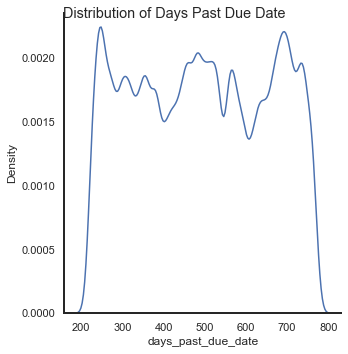

In [160]:
sns.displot(final_table, x="days_past_due_date", kind="kde", bw_adjust=.25)
plt.suptitle('Distribution of Days Past Due Date', y=0.98)
plt.show()

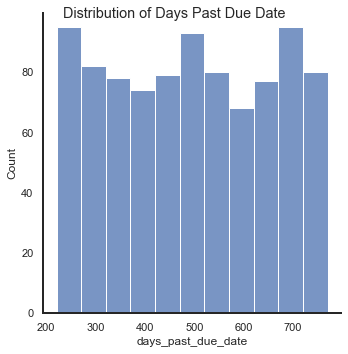

In [161]:
sns.displot(final_table, x="days_past_due_date")
plt.suptitle('Distribution of Days Past Due Date', y=0.98)
plt.show()

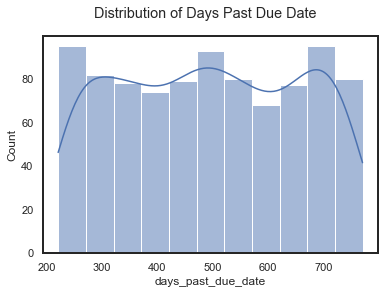

In [162]:
sns.histplot(data = final_table, x = "days_past_due_date", kde = True)
plt.suptitle('Distribution of Days Past Due Date', y=0.98)
plt.show()

Aggregating customer data

In [127]:
customer_aggregate= joined_table.groupby(['customer_id', 'firstname','lastname','email','profession']).agg(
    Total_Amount_Pending=('amount_pending', np.sum),
    Average_Due_Date=('due_date', np.mean),
    Last_Due_Date=('due_date', np.max))

In [128]:
customer_aggregate

,,,,,Total_Amount_Pending,Average_Due_Date,Last_Due_Date
customer_id,firstname,lastname,email,profession,,,
100,Tomasina,Marcellus,Tomasina.Marcellus@yopmail.com,police officer,1111.07,2020-11-26 16:00:00,2021-04-14
101,Alex,Rodmann,Alex.Rodmann@yopmail.com,developer,323.68,2021-12-03 00:00:00,2021-12-03
102,Diena,Manolo,Diena.Manolo@yopmail.com,firefighter,673.78,2021-01-08 00:00:00,2021-02-19
103,Cristine,Yuille,Cristine.Yuille@yopmail.com,firefighter,1540.29,2021-09-01 16:00:00,2021-12-21
110,Sashenka,Merell,Sashenka.Merell@yopmail.com,developer,1864.41,2021-04-18 06:00:00,2021-10-09
...,...,...,...,...,...,...,...
593,Brandise,Jerold,Brandise.Jerold@yopmail.com,developer,117.41,2021-01-08 00:00:00,2021-01-08
594,Flo,Natalia,Flo.Natalia@yopmail.com,firefighter,2038.26,2021-02-08 00:00:00,2021-11-07
595,Oralee,Moseley,Oralee.Moseley@yopmail.com,doctor,2657.89,2021-07-21 00:00:00,2021-10-27


Visualizing Distribution of number of loans:


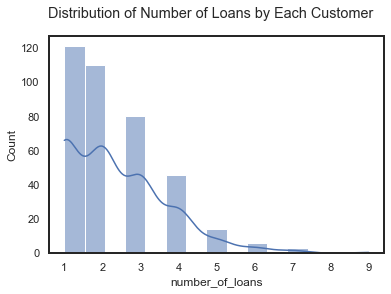

In [169]:
sns.histplot(data = number_of_loans, x = "number_of_loans", kde = True)
plt.suptitle('Distribution of Number of Loans by Each Customer', y=0.98)
plt.show()

Text(0.5, 0.98, 'Number of Loans by Profession')

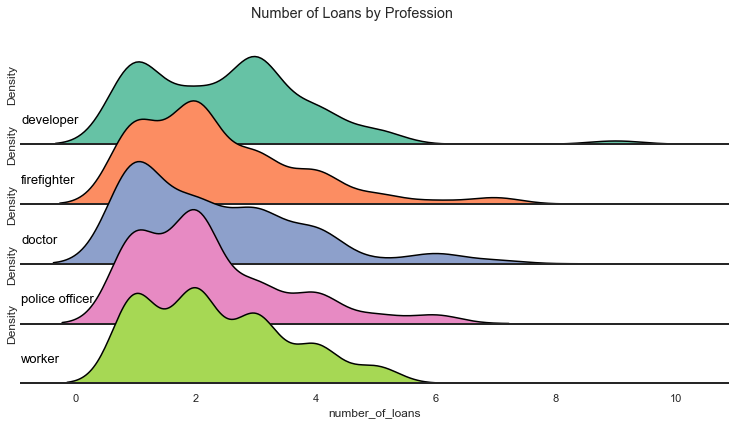

In [171]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(number_of_loans, palette=palette, row="profession", hue="profession", aspect=9, height=1.2)
g.map_dataframe(sns.kdeplot, x="number_of_loans", fill=True, alpha=1,bw_adjust=.75)
g.map_dataframe(sns.kdeplot, x="number_of_loans", color='black', bw_adjust=.75)
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)
    
g.map(label, "profession")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="number_of_loans")
g.despine( left=True)
plt.suptitle('Number of Loans by Profession', y=0.98)

Distribution of loan count vs profession and loan product

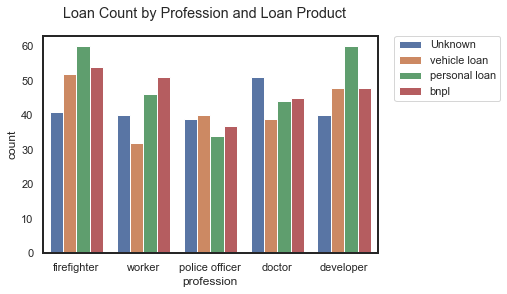

In [174]:
sns.countplot(x ='profession', hue = "loan_product", data = joined_table)
plt.suptitle('Loan Count by Profession and Loan Product', y=0.98)

legend = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
frame = legend.get_frame()
frame.set_facecolor('white')
# Show the plot
plt.show()

Count of unique customers by professions who have taken out loans

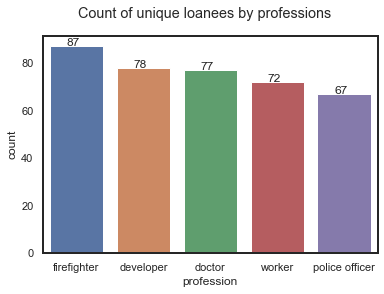

In [175]:
count= sns.countplot(x='profession', data=number_of_loans, order=number_of_loans['profession'].value_counts().index)
for profession in count.patches:
    count.annotate('{:.0f}'.format(profession.get_height()),(profession.get_x()+0.25,profession.get_height()+0.01))
plt.suptitle('Count of unique loanees by professions', y=0.98)
plt.show()

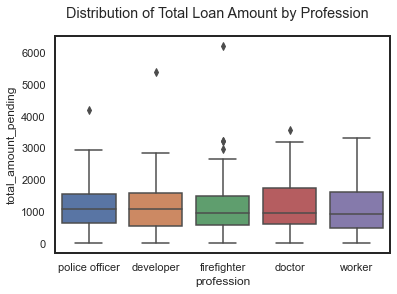

In [176]:
box=sns.boxplot(x=sum_of_loans['profession'],y=sum_of_loans['total_amount_pending'])
plt.suptitle('Distribution of Total Loan Amount by Profession', y=0.98)
plt.show()

Exporting the tables which have been created to a new excel file.

In [186]:
final_aggregate= customer_aggregate.merge(number_of_loans, how='inner', on='customer_id')

In [187]:
with pd.ExcelWriter('Views.xlsx') as writer:
    customers.to_excel(writer, sheet_name='customers', index=False)
    loan_details.to_excel(writer, sheet_name='loan details', index=False)
    joined_table.to_excel(writer, sheet_name='inner join', index=False)
    outer_join.to_excel(writer, sheet_name='outer join', index=False)
    no_loans.to_excel(writer, sheet_name='customers with no loans', index=False)
    final_table.to_excel(writer, sheet_name='days past due date', index=False)
    final_aggregate.to_excel(writer, sheet_name='customer aggregate')